In [8]:
%matplotlib inline
"""
 This script calculates embedding results against all available fast running
 benchmarks in the repository and saves results as single row csv table.

 Usage: ./evaluate_on_all -f <path to file> -o <path to output file>

 NOTE:
 * script doesn't evaluate on WordRep (nor its subset) as it is non standard
 for now and long running (unless some nearest neighbor approximation is used).

 * script is using CosAdd for calculating analogy answer.

 * script is not reporting results per category (for instance semantic/syntactic) in analogy benchmarks.
 It is easy to change it by passing category parameter to evaluate_analogy function (see help).
"""
from optparse import OptionParser
import logging
import os
from web.embeddings import fetch_GloVe, load_embedding
from web.datasets.utils import _get_dataset_dir

from web.evaluate import evaluate_on_all
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import json

import matplotlib
matplotlib.style.use('ggplot')

In [18]:
# Configure logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)

results = pd.DataFrame()

# Read meta data from file "embeddings_meta".
# It should contain a simple dict in json having the fields "filename" and "label".
# "filename" has to point to the  
meta = dict()
with open('embeddings_meta') as meta_file:    
    meta = json.load(meta_file)

fname = meta['filename']
print('use embeddings from file:', fname, 'with label:', meta['label'])

if not os.path.isfile(fname):
    raise IOError('file not found: '+fname)

use embeddings from file: /home/arne/ML/data/models/glove.6B/glove.6B.300d.glv with label: glove_6B_d300


In [19]:
#if not fname:
#    w = fetch_GloVe(corpus="wiki-6B", dim=300)
#else:
#if not os.path.isabs(fname):
#    fname = os.path.join(_get_dataset_dir(), fname)

#format = options.format

#if not format:
_, ext = os.path.splitext(fname)
if ext == ".bin":
    format = "word2vec_bin"
elif ext == ".txt" or ext == ".tsv":
    format = "word2vec"
elif ext == ".pkl":
    format = "dict"
elif ext == ".glv":
    format = "glove"

assert format in ['word2vec_bin', 'word2vec', 'glove', 'bin'], "Unrecognized format"

load_kwargs = {}
if format == "glove":
    load_kwargs['vocab_size'] = sum(1 for line in open(fname))
    load_kwargs['dim'] = len(next(open(fname)).split()) - 1
    print('glove_meta:', load_kwargs['vocab_size'], load_kwargs['dim'])

w = load_embedding(fname, format=format, normalize=True, lower=True, clean_words=False,
                   load_kwargs=load_kwargs)

results = evaluate_on_all(w)
print('DONE')

glove_meta: 400000 300


10:17:53 INFO:Tranformed 400000 into 400000 words
10:17:53 INFO:Calculating similarity benchmarks
10:17:53 INFO:Spearman correlation of scores on SimLex999 0.370500357109
10:17:53 WARNING:Missing 260 words. Will replace them with mean vector
10:17:53 INFO:Spearman correlation of scores on RW 0.35861154008
10:17:53 WARNING:Missing 24 words. Will replace them with mean vector
10:17:53 INFO:Spearman correlation of scores on WS353 0.521703020982
10:17:53 WARNING:Missing 11 words. Will replace them with mean vector
10:17:53 INFO:Spearman correlation of scores on WS353S 0.652531401216
10:17:53 WARNING:Missing 16 words. Will replace them with mean vector
10:17:54 INFO:Spearman correlation of scores on WS353R 0.446408391466
10:17:54 INFO:Spearman correlation of scores on MEN 0.737464696981
10:17:54 INFO:Spearman correlation of scores on MTurk 0.633181997885
10:17:54 INFO:Spearman correlation of scores on RG65 0.769524978861
10:17:54 INFO:Calculating analogy benchmarks
10:17:55 INFO:Processing 

DONE


In [20]:
out_fname = "results.csv"

if not results.empty:
    results['label'] = meta['label']

if(os.path.isfile(out_fname)):
    df = pd.read_csv(out_fname,index_col=0)
    results = pd.concat([df, results])

#results.iloc[-1, results.columns.get_loc('label')] = options.label if options.label else 'embedding-'+str(len(results.index))


results.describe() 
results.to_csv(out_fname)
logger.info("Saved results to "+out_fname)
results = pd.DataFrame()

10:22:27 INFO:Saved results to results.csv


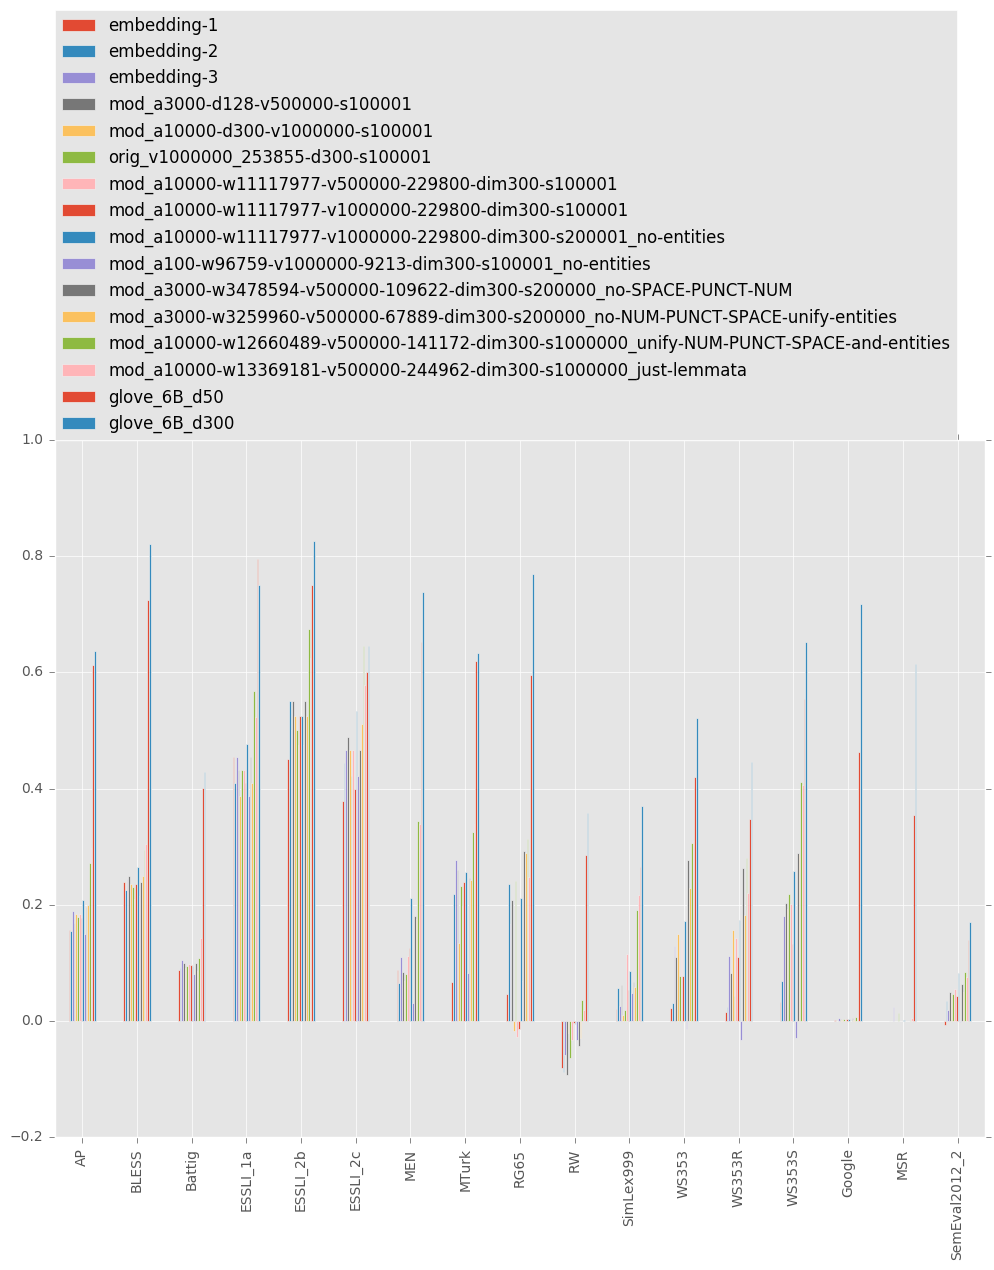

In [21]:
results = pd.read_csv(out_fname,index_col=0)
plt.rcParams["figure.figsize"] = [12, 9]
ax = results.set_index('label').T.plot.bar()
#ax.legend().set_visible(False)
ax.legend(loc=(0.0,1.0))
#plt.ylim(0, 30)
#ax.legend(loc='center right')
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.show()
#fig_size[0] = 12
#fig_size[1] = 9

#plt.figure(figsize=(10, 40))

#plt.show()